METHODS TO CHECK FOR SKEWNESS

1. SKEWNESS COEFFICIENT (Most Important)
----------------------------------------------------------------------

NORMAL:
  Skewness: 0.1170
  Direction: Right-skewed (positive)
  Interpretation: Approximately Symmetric ✓

RIGHT_SKEWED:
  Skewness: 1.9838
  Direction: Right-skewed (positive)
  Interpretation: Highly Skewed ⚠⚠

LEFT_SKEWED:
  Skewness: -1.6378
  Direction: Left-skewed (negative)
  Interpretation: Highly Skewed ⚠⚠

----------------------------------------------------------------------
SKEWNESS INTERPRETATION GUIDE:
----------------------------------------------------------------------
  -1 to -0.5  or  0.5 to 1   : Moderately skewed
  < -1       or  > 1         : Highly skewed
  -0.5 to 0.5                : Approximately symmetric
----------------------------------------------------------------------

2. MEAN vs MEDIAN COMPARISON
----------------------------------------------------------------------

NORMAL:
  Mean:   50.19
  Median: 50.25
 

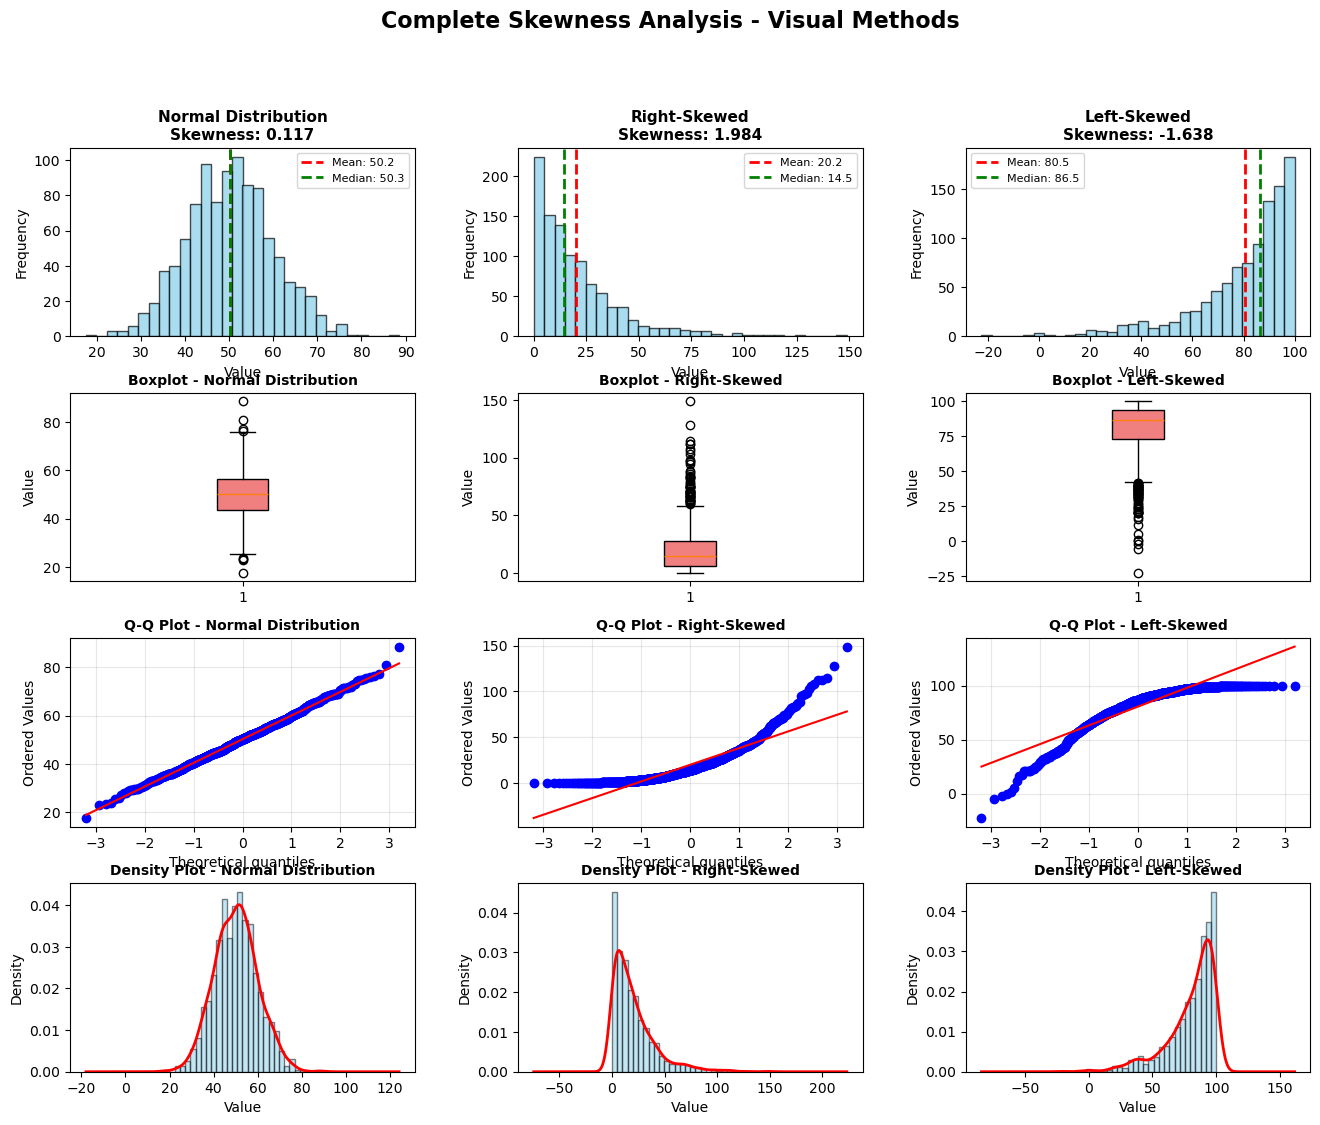


5. STATISTICAL TESTS FOR NORMALITY

NORMAL:
  Shapiro-Wilk Test:
    p-value: 0.627258
    → Data appears normally distributed (p >= 0.05)
  D'Agostino K² Test:
    p-value: 0.275888
    → Data appears normally distributed (p >= 0.05)

RIGHT_SKEWED:
  Shapiro-Wilk Test:
    p-value: 0.000000
    → Data is NOT normally distributed (p < 0.05)
  D'Agostino K² Test:
    p-value: 0.000000
    → Data is NOT normally distributed (p < 0.05)

LEFT_SKEWED:
  Shapiro-Wilk Test:
    p-value: 0.000000
    → Data is NOT normally distributed (p < 0.05)
  D'Agostino K² Test:
    p-value: 0.000000
    → Data is NOT normally distributed (p < 0.05)

SUMMARY TABLE
Distribution  Skewness      Mean    Median   Std Dev  Kurtosis
      Normal  0.116976 50.193321 50.253006  9.792159  0.072562
Right-Skewed  1.983789 20.159719 14.518624 20.059770  5.412459
 Left-Skewed -1.637836 80.534961 86.465899 18.906497  3.025650

QUICK REFERENCE GUIDE

CHECKING SKEWNESS - METHODS:

1. SKEWNESS COEFFICIENT (df['column'].sk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create sample datasets with different skewness
np.random.seed(42)

# Normal distribution (no skew)
normal_data = np.random.normal(50, 10, 1000)

# Right-skewed (positive skew)
right_skewed = np.random.exponential(scale=20, size=1000)

# Left-skewed (negative skew)
left_skewed = 100 - np.random.exponential(scale=20, size=1000)

# Create DataFrame
df = pd.DataFrame({
    'normal': normal_data,
    'right_skewed': right_skewed,
    'left_skewed': left_skewed
})

print("="*70)
print("METHODS TO CHECK FOR SKEWNESS")
print("="*70)

# ============ METHOD 1: Statistical Skewness Coefficient ============
print("\n1. SKEWNESS COEFFICIENT (Most Important)")
print("-" * 70)

for col in df.columns:
    skew_value = df[col].skew()
    print(f"\n{col.upper()}:")
    print(f"  Skewness: {skew_value:.4f}")
    
    # Interpretation
    if abs(skew_value) < 0.5:
        interpretation = "Approximately Symmetric ✓"
    elif abs(skew_value) < 1:
        interpretation = "Moderately Skewed ⚠"
    else:
        interpretation = "Highly Skewed ⚠⚠"
    
    if skew_value > 0:
        direction = "Right-skewed (positive)"
    elif skew_value < 0:
        direction = "Left-skewed (negative)"
    else:
        direction = "No skew"
    
    print(f"  Direction: {direction}")
    print(f"  Interpretation: {interpretation}")

print("\n" + "-" * 70)
print("SKEWNESS INTERPRETATION GUIDE:")
print("-" * 70)
print("  -1 to -0.5  or  0.5 to 1   : Moderately skewed")
print("  < -1       or  > 1         : Highly skewed")
print("  -0.5 to 0.5                : Approximately symmetric")
print("-" * 70)

# ============ METHOD 2: Mean vs Median Comparison ============
print("\n2. MEAN vs MEDIAN COMPARISON")
print("-" * 70)

for col in df.columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    diff = mean_val - median_val
    
    print(f"\n{col.upper()}:")
    print(f"  Mean:   {mean_val:.2f}")
    print(f"  Median: {median_val:.2f}")
    print(f"  Difference: {diff:.2f}")
    
    if abs(diff) < 1:
        print(f"  → Symmetric (Mean ≈ Median)")
    elif diff > 1:
        print(f"  → Right-skewed (Mean > Median)")
    else:
        print(f"  → Left-skewed (Mean < Median)")

# ============ METHOD 3: Pearson's Second Skewness Coefficient ============
print("\n3. PEARSON'S SKEWNESS COEFFICIENT")
print("-" * 70)

for col in df.columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    
    pearson_skew = 3 * (mean_val - median_val) / std_val
    
    print(f"\n{col.upper()}:")
    print(f"  Pearson Skewness: {pearson_skew:.4f}")

# ============ METHOD 4: Kurtosis (Bonus) ============
print("\n4. KURTOSIS (Measure of Tail Heaviness)")
print("-" * 70)

for col in df.columns:
    kurt_value = df[col].kurtosis()
    print(f"\n{col.upper()}:")
    print(f"  Kurtosis: {kurt_value:.4f}")
    
    if kurt_value > 0:
        print(f"  → Heavy tails (Leptokurtic)")
    elif kurt_value < 0:
        print(f"  → Light tails (Platykurtic)")
    else:
        print(f"  → Normal tails (Mesokurtic)")

# ============ VISUALIZATION ============
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

datasets = [
    ('normal', 'Normal Distribution', df['normal']),
    ('right_skewed', 'Right-Skewed', df['right_skewed']),
    ('left_skewed', 'Left-Skewed', df['left_skewed'])
]

for idx, (name, title, data) in enumerate(datasets):
    skew_val = data.skew()
    mean_val = data.mean()
    median_val = data.median()
    
    # Row 1: Histogram
    ax1 = fig.add_subplot(gs[0, idx])
    ax1.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    ax1.set_title(f'{title}\nSkewness: {skew_val:.3f}', fontweight='bold', fontsize=11)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.legend(fontsize=8)
    
    # Row 2: Boxplot
    ax2 = fig.add_subplot(gs[1, idx])
    bp = ax2.boxplot(data, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightcoral')
    ax2.set_title(f'Boxplot - {title}', fontweight='bold', fontsize=10)
    ax2.set_ylabel('Value')
    
    # Row 3: Q-Q Plot
    ax3 = fig.add_subplot(gs[2, idx])
    stats.probplot(data, dist="norm", plot=ax3)
    ax3.set_title(f'Q-Q Plot - {title}', fontweight='bold', fontsize=10)
    ax3.grid(True, alpha=0.3)
    
    # Row 4: KDE Plot
    ax4 = fig.add_subplot(gs[3, idx])
    ax4.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black')
    data.plot.kde(ax=ax4, color='red', linewidth=2)
    ax4.set_title(f'Density Plot - {title}', fontweight='bold', fontsize=10)
    ax4.set_xlabel('Value')
    ax4.set_ylabel('Density')

fig.suptitle('Complete Skewness Analysis - Visual Methods', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# ============ STATISTICAL TESTS ============
print("\n" + "="*70)
print("5. STATISTICAL TESTS FOR NORMALITY")
print("="*70)

for col in df.columns:
    print(f"\n{col.upper()}:")
    
    # Shapiro-Wilk Test
    statistic, p_value = stats.shapiro(df[col][:5000])  # Limit to 5000 samples
    print(f"  Shapiro-Wilk Test:")
    print(f"    p-value: {p_value:.6f}")
    if p_value < 0.05:
        print(f"    → Data is NOT normally distributed (p < 0.05)")
    else:
        print(f"    → Data appears normally distributed (p >= 0.05)")
    
    # D'Agostino's K-squared Test
    statistic, p_value = stats.normaltest(df[col])
    print(f"  D'Agostino K² Test:")
    print(f"    p-value: {p_value:.6f}")
    if p_value < 0.05:
        print(f"    → Data is NOT normally distributed (p < 0.05)")
    else:
        print(f"    → Data appears normally distributed (p >= 0.05)")

# ============ SUMMARY TABLE ============
print("\n" + "="*70)
print("SUMMARY TABLE")
print("="*70)

summary = pd.DataFrame({
    'Distribution': ['Normal', 'Right-Skewed', 'Left-Skewed'],
    'Skewness': [df['normal'].skew(), df['right_skewed'].skew(), df['left_skewed'].skew()],
    'Mean': [df['normal'].mean(), df['right_skewed'].mean(), df['left_skewed'].mean()],
    'Median': [df['normal'].median(), df['right_skewed'].median(), df['left_skewed'].median()],
    'Std Dev': [df['normal'].std(), df['right_skewed'].std(), df['left_skewed'].std()],
    'Kurtosis': [df['normal'].kurtosis(), df['right_skewed'].kurtosis(), df['left_skewed'].kurtosis()]
})

print(summary.to_string(index=False))

# ============ QUICK REFERENCE ============
print("\n" + "="*70)
print("QUICK REFERENCE GUIDE")
print("="*70)
print("""
CHECKING SKEWNESS - METHODS:

1. SKEWNESS COEFFICIENT (df['column'].skew()):
   • Most reliable numerical measure
   • -0.5 to 0.5: Fairly symmetric
   • 0.5 to 1 or -1 to -0.5: Moderately skewed
   • > 1 or < -1: Highly skewed

2. MEAN vs MEDIAN:
   • Mean > Median: Right-skewed
   • Mean < Median: Left-skewed
   • Mean ≈ Median: Symmetric

3. VISUAL INSPECTION:
   • Histogram: Look for tail direction
   • Boxplot: Check whisker lengths
   • Q-Q Plot: Deviations from diagonal line

4. STATISTICAL TESTS:
   • Shapiro-Wilk: Tests normality (p < 0.05 = not normal)
   • D'Agostino: Tests normality with skewness/kurtosis

WHAT TO DO IF DATA IS SKEWED?
   • Log transformation: np.log(data) for right-skew
   • Square root: np.sqrt(data) for moderate right-skew
   • Box-Cox: scipy.stats.boxcox(data)
   • Use robust methods: Median instead of mean
""")
print("="*70)